Imports sraty pierdaty


In [321]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [322]:
X = 1000
dataFrame = pd.read_csv("Data/processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [323]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


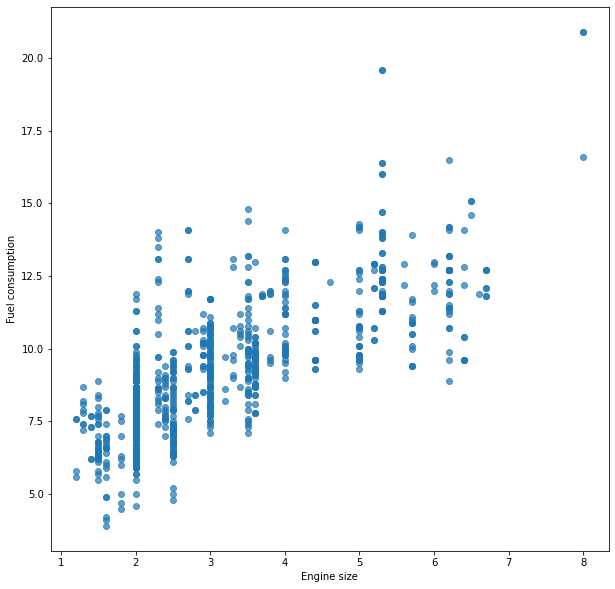

In [324]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

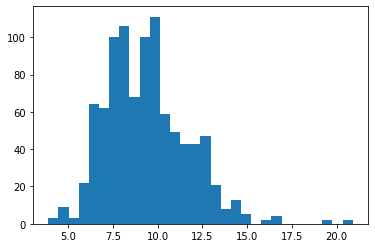

In [325]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [326]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']
fuel_consumption_data = dataFrame['Fuel Consumption(Hwy (L/100 km))']

In [327]:
model_1_prior=CmdStanModel(stan_file='Stan_files/model_1_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [328]:
samples_1_prior = model_1_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [329]:
dataFrame_model_1_prior = samples_1_prior.draws_pd()
dataFrame_model_1_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],fuel_consumption[4],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,16.62450,0.777181,-1.272270,2.12759,14.219300,17.69920,19.63680,21.90610,...,20.406100,18.83970,18.16190,17.89070,19.540900,23.55080,17.61950,18.74150,21.96760,22.95120
1,0.0,0.0,9.20844,0.457312,1.612690,1.78319,8.261550,13.33030,10.01320,14.59050,...,13.265400,11.93500,12.94670,12.44340,10.602100,11.53920,10.92580,12.79570,15.70010,9.50178
2,0.0,0.0,11.39010,0.912026,0.124858,2.58373,10.631000,15.24460,11.60650,11.96390,...,15.706100,21.72380,11.22340,14.73820,22.894600,16.24850,18.97400,20.04550,18.86400,17.94530
3,0.0,0.0,4.86689,-1.070230,-0.144217,1.24137,4.307780,4.17699,4.05143,6.20245,...,-0.215623,-1.59657,-2.81835,-1.64551,-0.555411,-1.32529,-1.41059,-2.95079,-3.42595,-3.90517
4,0.0,0.0,9.68974,0.517820,-0.533935,3.48873,0.833877,9.92886,1.92590,11.34880,...,11.033600,8.47153,12.38590,15.48150,11.702000,8.72725,8.09934,10.25610,11.87680,13.21150


In [330]:
list = []
for i in range(1,N):
    val = dataFrame_model_1_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)

max(list)
min(list)


8.301924834737925

In [331]:
#  test = dataFrame_model_1_prior.mean()
#  list = []
# for i in range(1,N):
#     val = dataFrame_model_1_prior['fuel_consumption[' + str(i)+ ']']
#     list.append(val)




(array([ 2.,  3.,  1.,  6.,  8.,  9.,  6., 15., 35., 30., 39., 48., 50.,
        76., 65., 82., 63., 67., 70., 61., 56., 44., 31., 25., 18., 14.,
         8.,  7.,  2.,  4.]),
 array([8.30192483, 8.31652561, 8.33112638, 8.34572716, 8.36032793,
        8.37492871, 8.38952948, 8.40413025, 8.41873103, 8.4333318 ,
        8.44793258, 8.46253335, 8.47713413, 8.4917349 , 8.50633567,
        8.52093645, 8.53553722, 8.550138  , 8.56473877, 8.57933955,
        8.59394032, 8.6085411 , 8.62314187, 8.63774264, 8.65234342,
        8.66694419, 8.68154497, 8.69614574, 8.71074652, 8.72534729,
        8.73994806]),
 <BarContainer object of 30 artists>)

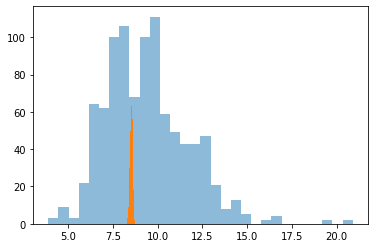

In [332]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30, alpha=0.5)
plt.hist(list,bins=30)


In [333]:
model_1_post=CmdStanModel(stan_file='Stan_files/model_1_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [334]:
samples_1_post = model_1_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [335]:
dataFrame_model_1_post = samples_1_post.draws_pd()
dataFrame_model_1_post.head()


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_drag_coeficient,...,log_lik[937],log_lik[938],log_lik[939],log_lik[940],log_lik[941],log_lik[942],log_lik[943],log_lik[944],log_lik[945],log_lik[946]
0,-824.288,0.923105,0.124811,5.0,31.0,0.0,825.315,2.52226,1.16566,8.65204,...,-1.60873,-1.29364,-1.29364,-1.29364,-1.60873,-1.66003,-1.66003,-11.0778,-2.21062,-11.0778
1,-826.125,0.995994,0.124811,4.0,15.0,0.0,826.642,2.31912,1.19302,9.01978,...,-1.67186,-1.30287,-1.30287,-1.30287,-1.67186,-1.72246,-1.72246,-10.8661,-2.09060,-10.8661
2,-823.741,0.999437,0.124811,5.0,31.0,0.0,827.745,2.93577,1.10952,8.01136,...,-1.49845,-1.24740,-1.24740,-1.24740,-1.49845,-1.55346,-1.55346,-12.3542,-2.49906,-12.3542
3,-824.089,0.920823,0.124811,3.0,7.0,0.0,824.396,2.91990,1.11037,8.16847,...,-1.52205,-1.25266,-1.25266,-1.25266,-1.52205,-1.57689,-1.57689,-12.1927,-2.44976,-12.1927
4,-822.865,0.987827,0.124811,4.0,15.0,0.0,824.324,2.91499,1.12437,7.97157,...,-1.54129,-1.27257,-1.27257,-1.27257,-1.54129,-1.59827,-1.59827,-11.7019,-2.37964,-11.7019


In [336]:
list = []
for i in range(1,N):
    val = dataFrame_model_1_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)


(array([  3.,   9.,   3.,  22.,  64.,  62., 100., 106.,  68., 100., 111.,
         59.,  49.,  43.,  43.,  47.,  21.,   8.,  13.,   5.,   0.,   2.,
          4.,   0.,   0.,   0.,   0.,   2.,   0.,   2.]),
 array([ 3.9       ,  4.46666667,  5.03333333,  5.6       ,  6.16666667,
         6.73333333,  7.3       ,  7.86666667,  8.43333333,  9.        ,
         9.56666667, 10.13333333, 10.7       , 11.26666667, 11.83333333,
        12.4       , 12.96666667, 13.53333333, 14.1       , 14.66666667,
        15.23333333, 15.8       , 16.36666667, 16.93333333, 17.5       ,
        18.06666667, 18.63333333, 19.2       , 19.76666667, 20.33333333,
        20.9       ]),
 <BarContainer object of 30 artists>)

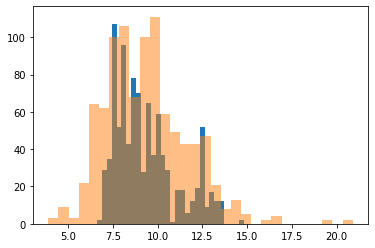

In [337]:
plt.hist(list,bins=30)
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30, alpha=0.5)

In [338]:
model_2_prior=CmdStanModel(stan_file='Stan_files/model_2_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [339]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [340]:
dataFrame_model_2_prior = samples_2_prior.draws_pd()
dataFrame_model_2_prior.head()
test = dataFrame_model_2_prior.mean(axis=0)


In [341]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)


(array([  3.,   9.,   3.,  22.,  64.,  62., 100., 106.,  68., 100., 111.,
         59.,  49.,  43.,  43.,  47.,  21.,   8.,  13.,   5.,   0.,   2.,
          4.,   0.,   0.,   0.,   0.,   2.,   0.,   2.]),
 array([ 3.9       ,  4.46666667,  5.03333333,  5.6       ,  6.16666667,
         6.73333333,  7.3       ,  7.86666667,  8.43333333,  9.        ,
         9.56666667, 10.13333333, 10.7       , 11.26666667, 11.83333333,
        12.4       , 12.96666667, 13.53333333, 14.1       , 14.66666667,
        15.23333333, 15.8       , 16.36666667, 16.93333333, 17.5       ,
        18.06666667, 18.63333333, 19.2       , 19.76666667, 20.33333333,
        20.9       ]),
 <BarContainer object of 30 artists>)

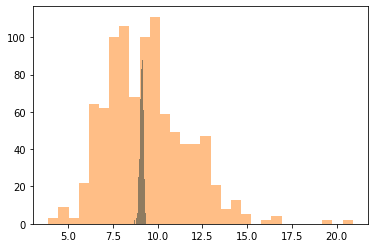

In [342]:
plt.hist(list,bins=30)
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30, alpha=0.5)

In [343]:
generated_fuel_consumption = samples_2_prior.stan_variable('fuel_consumption')

In [344]:
model_2_post=CmdStanModel(stan_file='Stan_files/model_2_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [345]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [346]:
dataFrame_model_2_post = samples_2_post.draws_pd()
dataFrame_model_2_post.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_cylinders,...,log_lik[937],log_lik[938],log_lik[939],log_lik[940],log_lik[941],log_lik[942],log_lik[943],log_lik[944],log_lik[945],log_lik[946]
0,-796.131,0.965834,0.090928,4.0,23.0,0.0,798.035,2.52955,0.554205,0.466085,...,-2.37996,-1.67394,-1.67394,-1.67394,-2.37996,-2.53017,-2.53017,-6.18686,-1.22055,-6.18686
1,-797.024,0.962694,0.090928,6.0,63.0,0.0,799.769,2.57069,0.699385,0.372554,...,-2.21145,-1.59502,-1.59502,-1.59502,-2.21145,-2.34691,-2.34691,-6.68072,-1.26605,-6.68072
2,-796.684,0.990184,0.090928,5.0,31.0,0.0,797.895,2.66912,0.612974,0.411043,...,-2.23891,-1.59436,-1.59436,-1.59436,-2.23891,-2.37777,-2.37777,-6.74225,-1.24183,-6.74225
3,-796.291,0.999456,0.090928,5.0,31.0,0.0,797.170,2.55143,0.617489,0.428451,...,-2.34206,-1.64585,-1.64585,-1.64585,-2.34206,-2.49453,-2.49453,-6.50890,-1.21443,-6.50890
4,-797.355,0.993391,0.090928,6.0,63.0,0.0,798.173,2.12798,0.724888,0.377721,...,-2.33372,-1.65387,-1.65387,-1.65387,-2.33372,-2.45015,-2.45015,-6.31526,-1.24978,-6.31526


In [347]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)


(array([  3.,   9.,   3.,  22.,  64.,  62., 100., 106.,  68., 100., 111.,
         59.,  49.,  43.,  43.,  47.,  21.,   8.,  13.,   5.,   0.,   2.,
          4.,   0.,   0.,   0.,   0.,   2.,   0.,   2.]),
 array([ 3.9       ,  4.46666667,  5.03333333,  5.6       ,  6.16666667,
         6.73333333,  7.3       ,  7.86666667,  8.43333333,  9.        ,
         9.56666667, 10.13333333, 10.7       , 11.26666667, 11.83333333,
        12.4       , 12.96666667, 13.53333333, 14.1       , 14.66666667,
        15.23333333, 15.8       , 16.36666667, 16.93333333, 17.5       ,
        18.06666667, 18.63333333, 19.2       , 19.76666667, 20.33333333,
        20.9       ]),
 <BarContainer object of 30 artists>)

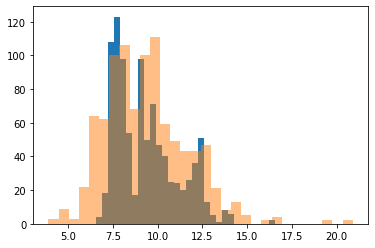

In [348]:
plt.hist(list,bins=30)
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30, alpha=0.5)

In [349]:
# price_sim = samples_1_post.stan_variable('y_out')
# plt.figure(figsize=[10,6])
# plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.5, s=10)
# plt.scatter(engine_size_data, price_sim.mean(), alpha=0.5, s=10)
# plt.title("Model 2 - Posterior predictive samples")
# plt.legend(["True values", "Predicted values"])
# plt.xlabel("Engine size")
# plt.ylabel("Fuel consumption")
# plt.grid()
# plt.show()

In [350]:
compare_dict_diff_number_pred = {"1_pred": samples_1_post}

In [351]:
# comp_result_waic = az.compare(compare_dict_diff_number_pred, ic='waic',scale='deviance')

In [352]:
# az.plot_compare(comp_result_waic)

In [353]:
def calcQuants(x, y):
    qlvls = [0, 1]
    quansList = [[], []]
    for i in range(y.shape[-1]):
        temp = y[:, i]
        for q, lvl in zip(quansList, qlvls):
            q.append(np.quantile(temp, lvl))
    return quansList

def quantsExtremes(df, y, q):
    carat_uq = df['Engine Size(L)'].unique()
    carat_uq = sorted(carat_uq)
    quansList = calcQuants(df['Engine Size(L)'], y)
    caratQuantDict = dict()
    for carat_val in carat_uq:
        caratList = np.array(df['Engine Size(L)'].tolist())
        idxs = np.where(caratList == carat_val)[0]
        qval = quansList[q][idxs[0]]
        for i in idxs:
            if q == 0 and quansList[q][i] < qval:
                qval = quansList[q][i]
            elif q == 1 and quansList[q][i] > qval:
                qval = quansList[q][i]
        caratQuantDict[carat_val] = qval
    return caratQuantDict

<Figure size 720x432 with 0 Axes>

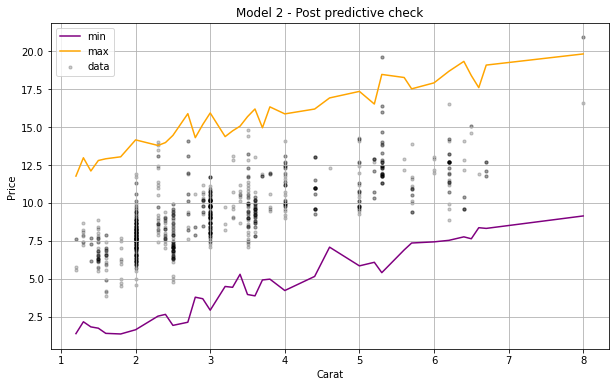

In [354]:
plt.figure(figsize=[10, 6])

price_sim = samples_1_post.stan_variable('y_out')

caratQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
caratMin = (caratQuantMinDict.keys())
quantMin = (caratQuantMinDict.values())

caratQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
caratMax = (caratQuantMaxDict.keys())
quantMax = (caratQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(caratMin, quantMin, color='purple')
plt.plot(caratMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

<Figure size 720x432 with 0 Axes>

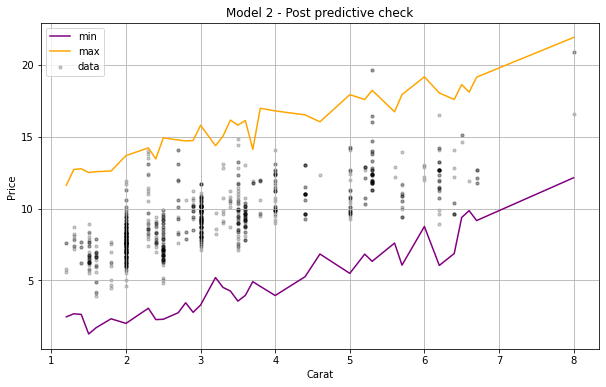

In [355]:
plt.figure(figsize=[10, 6])

price_sim = samples_2_post.stan_variable('y_out')

caratQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
caratMin = (caratQuantMinDict.keys())
quantMin = (caratQuantMinDict.values())

caratQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
caratMax = (caratQuantMaxDict.keys())
quantMax = (caratQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(caratMin, quantMin, color='purple')
plt.plot(caratMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

In [356]:
# dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
# y_out_var = samples_2_post.stan_variable('y_out')

# price_sim.density(figsize=(10,6), linewidth=2, color='red')
# plt.title('Density plot for Price')
# plt.legend(["True values", "Predicted values"])
# plt.grid()
# plt.show()

In [357]:
# fit_1 = az.from_dict(
#     posterior=samples_1_prior,
#     log_likelihood={"log_lik": samples_1_prior["log_lik"]},
#     observed_data={"fuel_consumption": fuel_consumption_data}
# )

# fit_2 = az.from_dict(
#     posterior=model_2_post,
#     log_likelihood={"log_lik": model_2_post["log_lik"]},
#     observed_data={"fuel_consumption": fuel_consumption_data}
# )

In [358]:
idata1 = az.from_cmdstanpy(
    posterior=samples_1_post,
    posterior_predictive='y_out',
    log_likelihood='log_lik',
    observed_data={'fuel_consumption': fuel_consumption_data}
)

idata2 = az.from_cmdstanpy(
    posterior=samples_2_post,
    posterior_predictive='y_out',
    log_likelihood='log_lik',
    observed_data={'fuel_consumption': fuel_consumption_data}
)




<AxesSubplot:xlabel='Log'>

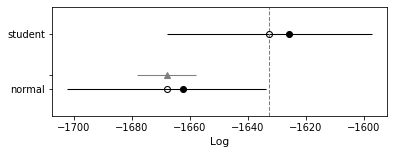

In [359]:
compare=az.compare({'normal':samples_1_post,'student':samples_2_post}, ic='loo')
az.plot_compare(compare)

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<AxesSubplot:xlabel='Log'>

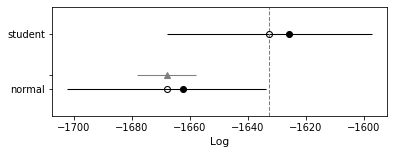

In [360]:
compare=az.compare({'normal':samples_1_post,'student':samples_2_post}, ic='waic')
az.plot_compare(compare)

In [361]:
# loo_result = az.loo(idata1, pointwise=True)

# compare_dict = {"Model_1": idata1, "Model_2": idata2}

comp_loo = az.compare(compare_dict, ic = "loo")

NameError: name 'compare_dict' is not defined